<a href="https://colab.research.google.com/github/Rafae1130/Fasion_mnist/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fashion= tf.keras.datasets.fashion_mnist

In [3]:
(X_train, Y_train), (x_test, y_test)= fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
np.shape(X_train)

(60000, 28, 28)

In [5]:
X_train , x_test=X_train/255. , x_test/255.

In [6]:
X_train= np.expand_dims(X_train, axis=-1)

In [7]:
np.shape(X_train)

(60000, 28, 28, 1)

In [8]:
x_test=np.expand_dims(x_test, axis=-1)

In [9]:
np.shape(x_test)

(10000, 28, 28, 1)

In [10]:
K=len(np.unique(Y_train))

In [11]:
i=Input(shape=X_train[0].shape)
x=Conv2D(32,  (3,3),  strides=2, activation='relu')(i)
x=Conv2D(64,  (3,3),  strides=2, activation='relu')(x)
x=Conv2D(128, (3,3),  strides=2, activation='relu')(x)
x=Flatten()(x)
x=Dense(512, activation='relu')(x)
x=Dense(K, activation='softmax')(x)

model=Model(i,x)



In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
r=model.fit(X_train, Y_train, batch_size=1, epochs=15, validation_data=(x_test,y_test))

Epoch 1/15
60000/60000 [==============================] - 254s 4ms/step - loss: 0.3297 - accuracy: 0.8757 - val_loss: 0.3721 - val_accuracy: 0.8721
Epoch 2/15
60000/60000 [==============================] - 254s 4ms/step - loss: 0.2954 - accuracy: 0.8887 - val_loss: 0.3723 - val_accuracy: 0.8745
Epoch 3/15
60000/60000 [==============================] - 254s 4ms/step - loss: 0.2778 - accuracy: 0.8956 - val_loss: 0.3668 - val_accuracy: 0.8823
Epoch 4/15
60000/60000 [==============================] - 252s 4ms/step - loss: 0.2647 - accuracy: 0.9012 - val_loss: 0.3708 - val_accuracy: 0.8827
Epoch 5/15
60000/60000 [==============================] - 275s 5ms/step - loss: 0.2533 - accuracy: 0.9048 - val_loss: 0.3818 - val_accuracy: 0.8812
Epoch 6/15
60000/60000 [==============================] - 252s 4ms/step - loss: 0.2442 - accuracy: 0.9099 - val_loss: 0.3933 - val_accuracy: 0.8830
Epoch 7/15
60000/60000 [==============================] - 272s 5ms/step - loss: 0.2345 - accuracy: 0.9126 - val_

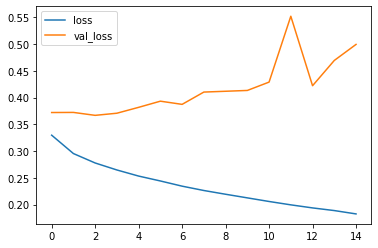

In [18]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.legend()

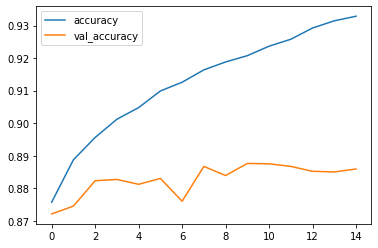

In [19]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')

plt.legend()

In [20]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4994 - accuracy: 0.8859


[0.4993637800216675, 0.8859000205993652]